In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Assign the latitudes and longitudes to a list called coordinates
coordinates=list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [5]:
# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | lufilufi
Processing Record 3 of Set 1 | krasnoselkup
Processing Record 4 of Set 1 | sao cristovao
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | grindavik
Processing Record 7 of Set 1 | vao
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | jonkoping
Processing Record 10 of Set 1 | san ramon
Processing Record 11 of Set 1 | hambantota
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | cabinda
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | smithers
Processing Record 17 of Set 1 | gunjur
Processing Record 18 of Set 1 | skovorodino
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | atar
Processing Record 23 of Set 1 | chapais
Processing Record 24 of Set 1 | hithadhoo
Processing Record 25 

Processing Record 38 of Set 4 | muisne
Processing Record 39 of Set 4 | turukhansk
Processing Record 40 of Set 4 | elko
Processing Record 41 of Set 4 | nome
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | phnum penh
City not found. Skipping...
Processing Record 46 of Set 4 | ust-uda
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | siuna
Processing Record 50 of Set 4 | yumen
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | whitehorse
Processing Record 3 of Set 5 | hilo
Processing Record 4 of Set 5 | santa fe
Processing Record 5 of Set 5 | pangkalanbuun
Processing Record 6 of Set 5 | otane
Processing Record 7 of Set 5 | henties bay
Processing Record 8 of Set 5 | tomatlan
Processing Record 9 of Set 5 | hasaki
Processing Record 10 of Set 5 | airai
Processing Record 11 of Set 5 | am

Processing Record 28 of Set 8 | carauari
Processing Record 29 of Set 8 | purpe
Processing Record 30 of Set 8 | meulaboh
Processing Record 31 of Set 8 | manado
Processing Record 32 of Set 8 | maceio
Processing Record 33 of Set 8 | tigil
Processing Record 34 of Set 8 | mocuba
Processing Record 35 of Set 8 | amahai
Processing Record 36 of Set 8 | nioro
Processing Record 37 of Set 8 | iralaya
Processing Record 38 of Set 8 | marawi
Processing Record 39 of Set 8 | yarada
Processing Record 40 of Set 8 | kemijarvi
Processing Record 41 of Set 8 | portland
Processing Record 42 of Set 8 | suba
Processing Record 43 of Set 8 | shiraoi
Processing Record 44 of Set 8 | la ronge
Processing Record 45 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 46 of Set 8 | scarborough
Processing Record 47 of Set 8 | vila franca do campo
Processing Record 48 of Set 8 | gigmoto
Processing Record 49 of Set 8 | ancud
Processing Record 50 of Set 8 | longyearbyen
Processing Record 1 of Set 9

Processing Record 18 of Set 12 | bonavista
Processing Record 19 of Set 12 | sabha
Processing Record 20 of Set 12 | linkou
Processing Record 21 of Set 12 | verkhnevilyuysk
Processing Record 22 of Set 12 | sistranda
Processing Record 23 of Set 12 | hefei
Processing Record 24 of Set 12 | feijo
Processing Record 25 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 26 of Set 12 | buritizeiro
Processing Record 27 of Set 12 | sadiqabad
Processing Record 28 of Set 12 | inta
Processing Record 29 of Set 12 | kaseda
Processing Record 30 of Set 12 | cockburn town
Processing Record 31 of Set 12 | mponela
Processing Record 32 of Set 12 | knysna
Processing Record 33 of Set 12 | holme
Processing Record 34 of Set 12 | boden
Processing Record 35 of Set 12 | mount darwin
Processing Record 36 of Set 12 | kysyl-syr
Processing Record 37 of Set 12 | mafinga
Processing Record 38 of Set 12 | karoi
Processing Record 39 of Set 12 | sisimiut
Processing Record 40 of Set 12 | gambela
Processing Rec

In [19]:
len(city_data)

563

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,80.92,80,40,9.22,US,2022-08-06 19:07:59
1,Lufilufi,-13.8745,-171.5986,79.95,76,63,14.03,WS,2022-08-06 19:07:59
2,Krasnoselkup,65.7000,82.4667,55.58,89,86,10.78,RU,2022-08-06 19:08:00
3,Sao Cristovao,-11.0147,-37.2064,78.71,73,75,6.91,BR,2022-08-06 19:08:00
4,Alofi,-19.0595,-169.9187,73.29,90,100,23.24,NU,2022-08-06 19:08:01
5,Grindavik,63.8424,-22.4338,52.27,100,100,13.80,IS,2022-08-06 19:08:01
6,Vao,-22.6667,167.4833,73.90,81,6,15.10,NC,2022-08-06 19:08:01
7,Ushuaia,-54.8000,-68.3000,37.06,75,0,3.44,AR,2022-08-06 19:04:01
8,Jonkoping,57.7814,14.1562,58.71,77,5,12.66,SE,2022-08-06 19:08:02
9,San Ramon,37.7799,-121.9780,79.48,61,0,12.66,US,2022-08-06 19:08:02


In [21]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [22]:
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-08-06 19:07:59,22.0752,-159.3190,80.92,80,40,9.22
1,Lufilufi,WS,2022-08-06 19:07:59,-13.8745,-171.5986,79.95,76,63,14.03
2,Krasnoselkup,RU,2022-08-06 19:08:00,65.7000,82.4667,55.58,89,86,10.78
3,Sao Cristovao,BR,2022-08-06 19:08:00,-11.0147,-37.2064,78.71,73,75,6.91
4,Alofi,NU,2022-08-06 19:08:01,-19.0595,-169.9187,73.29,90,100,23.24
5,Grindavik,IS,2022-08-06 19:08:01,63.8424,-22.4338,52.27,100,100,13.80
6,Vao,NC,2022-08-06 19:08:01,-22.6667,167.4833,73.90,81,6,15.10
7,Ushuaia,AR,2022-08-06 19:04:01,-54.8000,-68.3000,37.06,75,0,3.44
8,Jonkoping,SE,2022-08-06 19:08:02,57.7814,14.1562,58.71,77,5,12.66
9,San Ramon,US,2022-08-06 19:08:02,37.7799,-121.9780,79.48,61,0,12.66


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Get today's date in seconds.
today = time.time()
today

1659815714.7474945

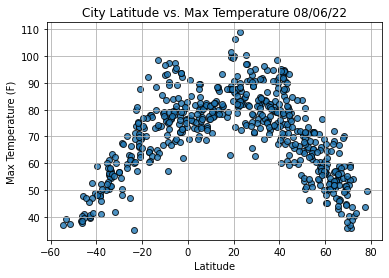

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/latvsmaxtemp.png")

# Show plot.
plt.show()

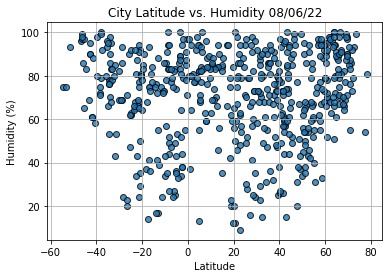

In [37]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/latvshumidity.png")

# Show plot.
plt.show()

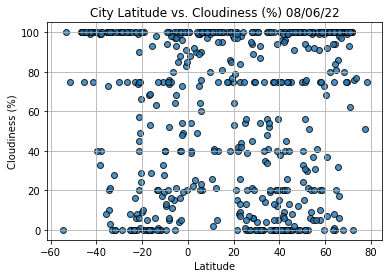

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latvscloudiness.png")
# Show plot.
plt.show()

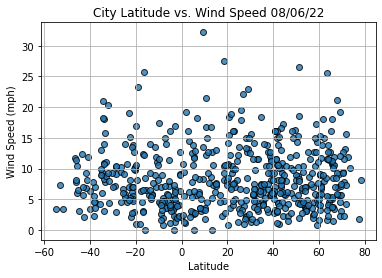

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latvswindspeed.png")
# Show plot.
plt.show()